# Sine Wave Dataset with Error

This notebook demonstrates how to:
1. Generate a sine wave dataset
2. Add a random error component (10% noise)
3. Visualize the data using a line chart
4. Compare the original sine wave with the noisy version

## 1. Setting Up the Environment

First, let's import the necessary libraries for our task:
- NumPy: For mathematical functions and array operations
- Pandas: For data manipulation and analysis
- Matplotlib: For basic plotting
- Plotly Express: For interactive visualizations

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Set a random seed for reproducibility
np.random.seed(42)

# Display plots inline in the notebook
%matplotlib inline
# Make plots a bit larger
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Generating the Sine Wave Dataset

We'll create a sine wave dataset with the following characteristics:
- X values from 0 to 4π (two complete cycles)
- Y values calculated as sin(x)
- 10% random noise added to the Y values

In [2]:
# Generate x values (from 0 to 4π)
x = np.linspace(0, 4 * np.pi, 200)

# Calculate pure sine wave
y_pure = np.sin(x)

# Calculate the amplitude of the sine wave
amplitude = np.max(y_pure) - np.min(y_pure)

# Add 10% random noise (relative to the amplitude)
noise_level = 0.1 * amplitude
y_noisy = y_pure + np.random.normal(0, noise_level, len(x))

# Create a DataFrame to store our data
df = pd.DataFrame({
    'x': x,
    'y_pure': y_pure,
    'y_noisy': y_noisy
})

# Display the first few rows of our dataset
df.head()

,x,y_pure,y_noisy
0,0.000000,0.000000,0.099340
1,0.063148,0.063106,0.035454
2,0.126295,0.125960,0.255493
3,0.189443,0.188312,0.492908
4,0.252590,0.249913,0.203084


## 3. Visualizing the Dataset

Let's visualize our data to see how the noisy sine wave compares to the pure sine wave.

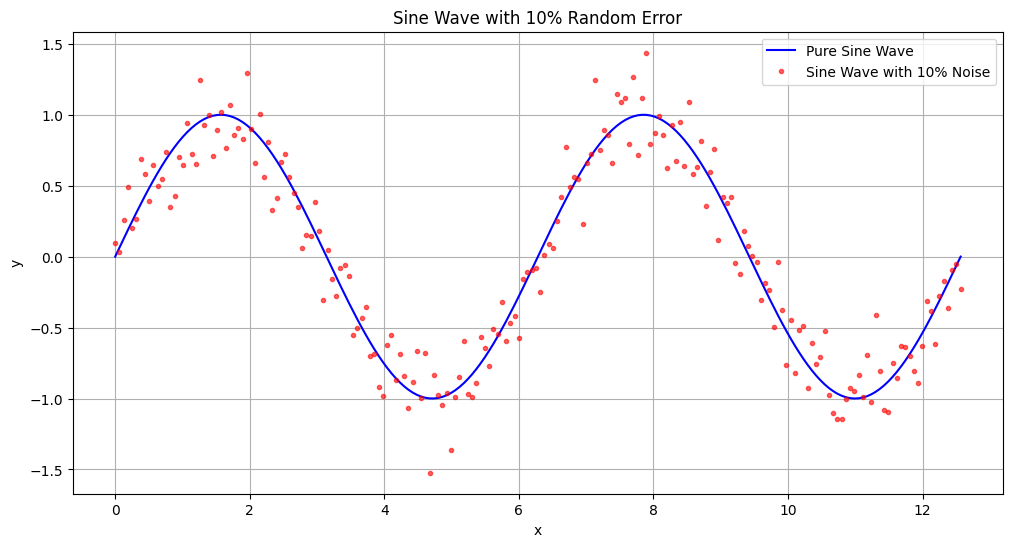

In [3]:
# Basic visualization with Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df['x'], df['y_pure'], 'b-', label='Pure Sine Wave')
plt.plot(df['x'], df['y_noisy'], 'r.', alpha=0.6, label='Sine Wave with 10% Noise')
plt.title('Sine Wave with 10% Random Error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 4. Interactive Visualization with Plotly

Plotly provides interactive visualizations that allow us to zoom, pan, and hover over data points.

In [4]:
# Create a long-format DataFrame for Plotly
df_long = pd.melt(df, id_vars=['x'], value_vars=['y_pure', 'y_noisy'], 
                  var_name='type', value_name='y')

# Create an interactive plot with Plotly Express
fig = px.line(df_long, x='x', y='y', color='type', 
              title='Sine Wave with 10% Random Error',
              labels={'x': 'X Value', 'y': 'Y Value', 'type': 'Type'},
              line_shape='linear')

# Add markers for the noisy data points
fig.add_scatter(x=df['x'], y=df['y_noisy'], mode='markers', 
                marker=dict(size=3, color='red', opacity=0.5), 
                name='Noisy Data Points', showlegend=True)

# Update layout
fig.update_layout(
    xaxis_title='X Value',
    yaxis_title='Y Value',
    legend_title='Data Type',
    template='plotly_white'
)

fig.show()

## 5. Calculating Error Statistics

Let's calculate some statistics to quantify the error we introduced:

In [5]:
# Calculate absolute error
df['absolute_error'] = np.abs(df['y_noisy'] - df['y_pure'])

# Calculate percentage error (avoiding division by zero)
df['percentage_error'] = np.where(
    df['y_pure'] != 0,
    np.abs((df['y_noisy'] - df['y_pure']) / df['y_pure']) * 100,
    np.nan
)

# Display error statistics
error_stats = {
    'Mean Absolute Error': df['absolute_error'].mean(),
    'Max Absolute Error': df['absolute_error'].max(),
    'Mean Percentage Error': df['percentage_error'].mean(),
    'Standard Deviation of Error': df['absolute_error'].std()
}

pd.DataFrame([error_stats]).T.rename(columns={0: 'Value'})

,Value
Mean Absolute Error,1.478963e-01
Max Absolute Error,5.440169e-01
Mean Percentage Error,2.344917e+14
Standard Deviation of Error,1.129255e-01


## 6. Conclusion

In this notebook, we've:
- Generated a pure sine wave dataset
- Added 10% random noise to create a realistic dataset with errors
- Visualized both the original and noisy datasets using matplotlib and plotly
- Calculated error statistics to quantify the noise

This type of synthetic dataset with controlled noise can be useful for:
- Testing data analysis algorithms
- Practicing signal processing techniques
- Benchmarking machine learning models
- Understanding the impact of measurement errors on data analysis